# Pandas

## What is panadas

- Pandas is a Python library for data analysis and manipulation.
- It is built on top of the NumPy library.
- It offers data structures and operations for manipulating numerical tables and time series.
- It provides data analysis tools for exploratory data analysis, data cleaning, and data transformation.
- It also provides data visualization features.
- It's free to use and open source.

## Installation

To install pandas, you can use the following command:

```bash
conda install -c conda-forge pandas
```

## Import pandas

To import pandas, you can use the following command:

In [ ]:
import pandas as pd

**Note :** When importing pandas, it's by convention to use the alias `pd`.

## Pandas - Data Structures

Pandas has two main data structures: `Series` and `DataFrames`.

- A DataFrame is a two-dimensional labeled data structure with columns of potentially different types.
- A Series is a one-dimensional labeled array.

## Pandas - Data Structures
### DataFrames

A DataFrame is a table. It contains an array of individual entries, each of which has a certain value. Each entry corresponds to a row (or record) and a column

In [ ]:
pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]})

In the previous example:
  - `Yes` and `No` are the column names
  - `50` and `21` are the values in the `Yes` column
  - `131` and `2` are the values in the `No` column
  - yes/0 is 50; yes/1 is 21; no/0 is 131; no/1 is 2

### DataFrames

The `Dataframes` object is not limited to numbers values. It can contain any data type.

In [ ]:
df = pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 'Sue': ['Pretty good.', 'Bland.']})
print(df)
df["Bob"][0]

We are using the `pd.DataFrame()` constructor to instaciate these DataFrame objects. 

The syntax for declaring a new one is a dictionary whose keys are the column names (`Bob` and `Sue` in this example), and whose values are a list of entries. This is the standard way of constructing a new DataFrame, and the one you are most likely to encounter.

The dictionary-list constructor assigns values to the column labels, but just uses an *ascending count* from 0 (0, 1, 2, 3, ...) for the row labels. Sometimes this is OK, but oftentimes we will want to assign these labels ourselves.

The list of row labels used in a DataFrame is known as an `Index`. We can assign values to it by using an index parameter in our constructor:

In [ ]:
df = pd.DataFrame({
    'Bob': ['I liked it.', 'It was awful.'], 
    'Sue': ['Pretty good.', 'Bland.']
}, index=['Product A', 'Product B'])
df["Bob"]['Product A']

In [ ]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.', 2], 
              'Sue': ['', 'Bland.', 1]},
             index=['Product A', 'Product B', "Product_count"])

## Pandas - Data Structures
### Series

A Series, by contrast, is a sequence of data values. If a DataFrame is a table, a Series is a list :

In [ ]:
s = pd.Series([1, 2, 3, 4, 5])
s

**Note :** In fact you can create one with nothing more than a python list

### Series

You can visualize a Series as a single column of a DataFrame. So you can assign row labels to the Series the same way as before, using an `index` parameter. However, a Series does not have a column name, it only has one overall name:

In [ ]:
serie_label = pd.Series([30, 35, 40], index=['2015 Sales', '2016 Sales', '2017 Sales'], name='Product A')
print("serie_label", serie_label, sep="\n")

## Pandas - Data Structures
### Conclusion

The Series and the DataFrame are intimately related. It's helpful to think of a `DataFrame` as actually being just a bunch of Series "glued together".

## Pandas - Reading Data Files

Being able to create a DataFrame or Series by hand is handy. But, most of the time, we won't actually be creating our own data by hand. Instead, we'll be working with data that already exists.

Pandas has built-in methods for reading data from various file formats including CSV, Excel, JSON, and SQL.

## Pandas - Reading Data Files

Here is a table of the different types of files that pandas can read:

| Data Format | Read | Write |
|------------|------|-------|
| CSV | pd.read_csv | pd.to_csv |
| Excel | pd.read_excel | pd.to_excel |
| JSON | pd.read_json | pd.to_json |
| SQL | pd.read_sql | pd.to_sql |
| HTML | pd.read_html | pd.to_html |


**Note :** in this notebook we'll use the CSV file format

In [ ]:
wine_reviews = pd.read_csv("./data/numpy_pandas/dataset/wine-reviews/winemag-data-130k-v2.csv")
wine_reviews.shape

**Note :** We can see that this dataset has 129971 rows and 14 columns. This is like 1.8 Millions of entries.

## Pandas - Reading Data Files
### pd.read_csv()

The `pd.read_csv()` method contains many parameters :

| Parameter | Description |
|-----------|-------------|
| filepath_or_buffer | The path to the file to read. Can be a URL. |
| sep | The separator for the columns. By default, it is a comma. |
| delimiter | The separator for the columns. By default, it is a comma. |
| header | The row to use as the column names. By default, it is the first row. |
| names | The column names. By default, it is None. |
| index_col | The column to use as the index. By default, it is None. |
| usecols | The columns to use. By default, it is None. |
| encoding | The encoding to use. By default, it is None. |
| engine | The engine to use. By default, it is None. |
| squeeze | If the data is only one column, return a Series. By default, it is False. |
| skiprows | The rows to skip. By default, it is None. |
| nrows | The number of rows to read. By default, it is None. |
| na_values | The values to use for missing values. By default, it is None. |
| parse_dates | If True, parse the dates. By default, it is False. |
| infer_datetime_format | If True, infer the datetime format. By default, it is False. |

## Pandas - Reading Data Files
### Head and Tail

We can visulize the first and last rows of a DataFrame:
  - If I call directly the `DataFrame` object, I'll see the first 5 rows and the last 5 rows
  - If I call the `head()` method, I'll see the first 5 rows
  - If I call the `tail()` method, I'll see the last 5 rows

In [ ]:
(wine_reviews)

In [ ]:
(wine_reviews.head())

In [ ]:
print(wine_reviews.tail(1))

If we look at the data more precisely, we can see that the dataset has a built-in index. If we want to use this column as index for the data we need to specify the `index_col` parameter.


In [ ]:
wine_reviews = pd.read_csv("./data/numpy_pandas/dataset/wine-reviews/winemag-data-130k-v2.csv", index_col=0)
wine_reviews.head()

## Pandas - Indexing, Selecting, Assigning
### Introduction

Selecting specific values of a pandas DataFrame or Series to work on is an implicit step in almost any data operation you'll run, so one of the first things you need to learn in working with data in Python is how to go about selecting the data points relevant to you quickly and effectively.

In [ ]:
pd.set_option('display.max_rows', 10)
reviews = pd.read_csv("./data/numpy_pandas/dataset/wine-reviews/winemag-data-130k-v2.csv", index_col=0)

## Pandas - Indexing, Selecting, Assigning
### Native accessors

Native Python objects provide good ways of indexing data. Pandas carries all of these over, which helps make it easy to start with.

Consider this DataFrame:

In [ ]:
reviews

In Python, we can access the property of an object by accessing it as an attribute. A `book` object, for example, might have a `title` property, which we can access by calling `book.title`. Columns in a pandas DataFrame work in much the same way.

Hence to access the country property of reviews we can use:

In [ ]:
reviews.country

If we have a Python dictionary, we can access its values using the indexing ([]) operator. We can do the same with columns in a DataFrame:

In [ ]:
reviews['country']

**Note :** These are the two ways of selecting a specific Series out of a DataFrame. Neither of them is more or less syntactically valid than the other, but the indexing operator [] does have the advantage that it can handle column names with reserved characters in them (e.g. if we had a country providence column, reviews.country providence wouldn't work).

In [ ]:
reviews.country[0]

## Pandas - Indexing, Selecting, Assigning
### Indexing in Pandas

The indexing operator and attribute selection are nice because they work just like they do in the rest of the Python ecosystem. 

However, pandas has its own accessor operators, `loc` and `iloc`. For more advanced operations, these are the ones you're supposed to be using

- `loc` for label-based indexing
- `iloc` for Index-based indexing

#### Index-based selection

`iloc` selects data based on its numerical position in the data. iloc follows this paradigm.

To select the first row of data in a DataFrame, we may use the following:

In [ ]:
reviews.iloc[0]

**Note :** Both `loc` and `iloc` are row-first, column-second. This is the opposite of what we do in native Python, which is column-first, row-second.

This means that it's marginally easier to retrieve rows, and marginally harder to get retrieve columns. 

To get a column with iloc, we can do the following:

In [ ]:
reviews.iloc[:, 0]

On its own, the : operator, which also comes from native Python, means "everything". When combined with other selectors, however, it can be used to indicate a range of values. For example, to select the country column from just the first, second, and third row, we would do:

Or, to select just the second and third entries, we would do:

In [ ]:
reviews.iloc[:3, 0]

It's also possible to pass a list:

In [ ]:
reviews.iloc[[0, 10, 20], 0]

Finally, it's worth knowing that negative numbers can be used in selection.

In [ ]:
reviews.iloc[-5:, 0]

#### Index-based selection

The second paradigm for attribute selection is the one followed by the `loc` operator: **label-based selection**. In this paradigm, it's the data index value, not its position, which matters.

For example, to get the first entry in `reviews`, we would now do the following:

In [ ]:
reviews.loc[0, 'country']

**Note :** iloc is conceptually simpler than loc because it ignores the dataset's indices. When we use iloc we treat the dataset like a big matrix (a list of lists), one that we have to index into by position. loc, by contrast, uses the information in the indices to do its work

Since your dataset usually has meaningful indices, it's usually easier to do things using loc instead. For example, here's one operation that's much easier using loc:

In [ ]:
reviews.loc[:, ['taster_name', 'taster_twitter_handle', 'points']]
reviews.iloc[:, [8, 9, 3]]

#### Choosing between `loc` and `iloc`

When choosing or transitioning between `loc` and `iloc`, there is one "gotcha" worth keeping in mind, which is that the two methods use slightly different indexing schemes.

`iloc` uses the Python stdlib indexing scheme, where the first element of the range is included and the last one excluded. So 0:10 will select entries 0,...,9. `loc`, meanwhile, indexes inclusively. So 0:10 will select entries 0,...,10.

Why the change? Remember that `loc` can index any stdlib type: strings, for example. If we have a DataFrame with index values Apples, ..., Potatoes, ..., and we want to select "all the alphabetical fruit choices between Apples and Potatoes", then it's a heck of a lot more convenient to index `df.loc['Apples':'Potatoes']` than it is to index something like `df.loc['Apples', 'Potatoed']` (`t` coming after `s` in the alphabet).

This is particularly confusing when the DataFrame index is a simple numerical list, e.g. 0,...,1000. In this case df.iloc[0:1000] will return 1000 entries, while df.loc[0:1000] return 1001 of them! To get 1000 elements using loc, you will need to go one lower and ask for df.loc[0:999].

Otherwise, the semantics of using loc are the same as those for iloc.

#### Manipulating the index

Label-based selection derives its power from the labels in the index. Critically, the index we use is not immutable. We can manipulate the index in any way we see fit.

The `set_index()` method can be used to do the job. Here is what happens when we `set_index` to the `title` field:

In [ ]:
reviews.set_index("title")

#### Conditional selection

So far we've been indexing various strides of data, using structural properties of the DataFrame itself. To do *interesting* things with the data, however, we often need to ask questions based on conditions.

For example, suppose that we're interested specifically in better-than-average wines produced in Italy.

We can start by checking if each wine is Italian or not:

In [ ]:
reviews.country == 'Italy'

This operation produced a Series of True/False booleans based on the country of each record. This result can then be used inside of loc to select the relevant data:

In [ ]:
italian_wines = reviews.loc[reviews.country == 'Italy']
italian_wines

**Note :** This DataFrame has ~20,000 rows. The original had ~130,000. That means that around 15% of wines originate from Italy.

We also wanted to know which ones are better than average. Wines are reviewed on a 80-to-100 point scale, so this could mean wines that accrued at least 90 points.

We can use the ampersand (`&`) to bring the two questions together:

In [ ]:
reviews.loc[(reviews.country == 'Italy') & (reviews.points >= 90)]

Suppose we'll buy any wine that's made in Italy or which is rated above average. For this we use a pipe (|):

In [ ]:
reviews.loc[(reviews.country == 'Italy') | (reviews.points >= 90)]

## Pandas Built-in conditinal selectors

| Selector | Description |
|----------|-------------|
| `isin()` | Selects rows where the column contains one or more values |
| `isnull()` | Selects rows where the column is null |
| `notnull()` | Selects rows where the column is not null |
| `between()` | Selects rows where the column is between two values |
| `any()` | Selects rows where the column contains at least one non-null value |
| `all()` | Selects rows where the column contains all non-null values |

In [ ]:
reviews.loc[reviews.country.isin(['Italy', 'France'])]

**Note :** The second is isnull (and its companion notnull). These methods let you highlight values which are (or are not) empty (NaN). For example, to filter out wines lacking a price tag in the dataset, here's what we would do:

In [ ]:
reviews.loc[reviews.designation.notnull()]

#### Assagning data

Going the other way, assigning data to a DataFrame is easy. You can assign either a constant value:

In [ ]:
reviews['critic'] = 'everyone'
reviews

In [ ]:
# Or with iterable values
reviews['index_backwards'] = range(len(reviews)-1, -1, -1)
reviews['index_backwards']

## Summary functions and Maps
### Introduction

In the last tutorial, we learned how to select relevant data out of a DataFrame or Series. Plucking the right data out of our data representation is critical to getting work done, as we demonstrated in the exercises.

However, the data does not always come out of memory in the format we want it in right out of the bat. Sometimes we have to do some more work ourselves to reformat it for the task at hand. This tutorial will cover different operations we can apply to our data to get the input "just right".

In [ ]:
import numpy as np

### Summary functions

Pandas provides many simple "summary functions" (not an official name) which restructure the data in some useful way. 

For example, consider the `describe()` method:

In [158]:
pd.set_option('display.max_rows', 10)
reviews = pd.read_csv("./data/numpy_pandas/dataset/wine-reviews/winemag-data-130k-v2.csv", index_col=0)
reviews.points.describe()

count    129971.000000
mean         88.446930
std           3.040752
min          60.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

This method generates a high-level summary of the attributes of the given column. It is type-aware, meaning that its output changes based on the data type of the input. The output above only makes sense for numerical data; for string data here's what we get:

In [ ]:
reviews.taster_name.describe()

If you want to get some particular simple summary statistic about a column in a DataFrame or a Series, there is usually a helpful pandas function that makes it happen.

For example, to see the mean of the points allotted (e.g. how well an averagely rated wine does), we can use the mean() function:

In [ ]:
reviews.points.mean()

To see a list of unique values we can use the unique() function:

In [ ]:
reviews.taster_name.unique()

To see a list of unique values and how often they occur in the dataset, we can use the value_counts() method:

In [ ]:
reviews.taster_name.value_counts()

### Maps

A map is a term, borrowed from mathematics, for a function that takes one set of values and "maps" them to another set of values. In data science we often have a need for creating new representations from existing data, or for transforming data from the format it is in now to the format that we want it to be in later. Maps are what handle this work, making them extremely important for getting your work done!

There are two mapping methods that you will use often.
  - `map()`
  - `apply()`

`map()`  is the first, and slightly simpler one. For example, suppose that we wanted to remean the scores the wines received to 0. We can do this as follows:

In [ ]:
review_points_mean = reviews.points.mean()
reviews.points.map(lambda p: p - review_points_mean)

**Note :** The function you pass to map() should expect a single value from the Series (a point value, in the above example), and return a transformed version of that value. 

map() returns a new Series where all the values have been transformed by your function

apply() is the equivalent method if we want to transform a whole DataFrame by calling a custom method on each row.

In [ ]:
def remean_points(row):
    row.points = row.points - review_points_mean
    return row

reviews.apply(remean_points, axis='columns')

If we had called reviews.apply() with axis='index', then instead of passing a function to transform each row, we would need to give a function to transform each column.

**Note :** that map() and apply() return new, transformed Series and DataFrames, respectively. They don't modify the original data they're called on. If we look at the first row of reviews, we can see that it still has its original points value.

In [ ]:
reviews.head(1)

Pandas provides many common mapping operations as built-ins. For example, here's a faster way of remeaning our points column:

In [ ]:
review_points_mean = reviews.points.mean()
reviews.points - review_points_mean

In this code we are performing an operation between a lot of values on the left-hand side (everything in the Series) and a single value on the right-hand side (the mean value). Pandas looks at this expression and figures out that we must mean to subtract that mean value from every value in the dataset.

Pandas will also understand what to do if we perform these operations between Series of equal length. For example, an easy way of combining country and region information in the dataset would be to do the following:

In [ ]:
reviews.country + " - " + reviews.region_1

These operators are faster than map() or apply() because they use speed ups built into pandas. All of the standard Python operators (>, <, ==, and so on) work in this manner.

However, they are not as flexible as map() or apply(), which can do more advanced things, like applying conditional logic, which cannot be done with addition and subtraction alone.

## Pandas - Grouping and sorting
### Introduction

Maps allow us to transform data in a DataFrame or Series one value at a time for an entire column. However, often we want to group our data, and then do something specific to the group the data is in.

As you'll learn, we do this with the groupby() operation. We'll also cover some additional topics, such as more complex ways to index your DataFrames, along with how to sort your data.

### Groupwise analysis

One function we've been using heavily thus far is the value_counts() function. We can replicate what value_counts() does by doing the following:

In [159]:
reviews.groupby('points').points.count()

points
60        1
80      397
81      692
82     1836
83     3025
       ... 
96      523
97      229
98       77
99       33
100      19
Name: points, Length: 22, dtype: int64

groupby() created a group of reviews which allotted the same point values to the given wines. Then, for each of these groups, we grabbed the points() column and counted how many times it appeared.  value_counts() is just a shortcut to this groupby() operation.
  
We can use any of the summary functions we've used before with this data. For example, to get the cheapest wine in each point value category, we can do the following:

In [165]:
reviews.groupby('points').price.mean()

points
60      15.000000
80      16.372152
81      17.182353
82      18.870767
83      18.237353
          ...    
96     159.292531
97     207.173913
98     245.492754
99     284.214286
100    485.947368
Name: price, Length: 22, dtype: float64

You can think of each group we generate as being a slice of our DataFrame containing only data with values that match. This DataFrame is accessible to us directly using the apply() method, and we can then manipulate the data in any way we see fit. 

For example, here's one way of selecting the name of the first wine reviewed from each winery in the dataset:

In [166]:
reviews.groupby('winery').apply(lambda df: df.title.iloc[0])

winery
1+1=3                                     1+1=3 NV Rosé Sparkling (Cava)
10 Knots                            10 Knots 2010 Viognier (Paso Robles)
100 Percent Wine              100 Percent Wine 2015 Moscato (California)
1000 Stories           1000 Stories 2013 Bourbon Barrel Aged Zinfande...
1070 Green                  1070 Green 2011 Sauvignon Blanc (Rutherford)
                                             ...                        
Órale                       Órale 2011 Cabronita Red (Santa Ynez Valley)
Öko                    Öko 2013 Made With Organically Grown Grapes Ma...
Ökonomierat Rebholz    Ökonomierat Rebholz 2007 Von Rotliegenden Spät...
àMaurice               àMaurice 2013 Fred Estate Syrah (Walla Walla V...
Štoka                                    Štoka 2009 Izbrani Teran (Kras)
Length: 16757, dtype: object

For even more fine-grained control, you can also group by more than one column.

For an example, here's how we would pick out the best wine by country and province:

In [167]:
reviews.groupby(['country', 'province']).apply(lambda df: df.loc[df.points.idxmax()])

country   
country   province                      
Argentina Mendoza Province  Argentina  \
          Other             Argentina   
Armenia   Armenia             Armenia   
Australia Australia Other   Australia   
          New South Wales   Australia   
...                               ...   
Uruguay   Juanico             Uruguay   
          Montevideo          Uruguay   
          Progreso            Uruguay   
          San Jose            Uruguay   
          Uruguay             Uruguay   

                                                                  description   
country   province                                                              
Argentina Mendoza Province  If the color doesn't tell the full story, the ...  \
          Other             Take note, this could be the best wine Colomé ...   
Armenia   Armenia           Deep salmon in color, this wine offers a bouqu...   
Australia Australia Other   Writes the book on how to make a wine filled w...   
          New South Wales   De Bortoli's Noble One is as good as ever in 2...   
...                                                                       ...   
Uruguay   Juanico           This mature Bordeaux-style blend is earthy on ...   
          Montevideo        A rich, heady bouquet offers aromas of blackbe...   
          Progreso          Rusty in color but deep and complex in nature,...   
          San Jose          Baked, sweet, heavy aromas turn earthy with ti...   
          Uruguay           Cherry and berry aromas are ripe, healthy and ...   

                                                        designation  points   
country   province                                                            
Argentina Mendoza Province                         Nicasia Vineyard      97  \
          Other                                             Reserva      95   
Armenia   Armenia                                    Estate Bottled      88   
Australia Australia Other                             Sarah's Blend      93   
          New South Wales                        Noble One Bortytis      94   
...                                                             ...     ...   
Uruguay   Juanico                  Preludio Barrel Select Lote N 77      90   
          Montevideo        Monte Vide Eu Tannat-Merlot-Tempranillo      91   
          Progreso                   Etxe Oneko Fortified Sweet Red      90   
          San Jose                         El Preciado Gran Reserva      87   
          Uruguay                         Blend 002 Limited Edition      91   

                            price          province                 region_1   
country   province                                                             
Argentina Mendoza Province  120.0  Mendoza Province                  Mendoza  \
          Other              90.0             Other                    Salta   
Armenia   Armenia            15.0           Armenia                      NaN   
Australia Australia Other    15.0   Australia Other  South Eastern Australia   
          New South Wales    32.0   New South Wales          New South Wales   
...                           ...               ...                      ...   
Uruguay   Juanico            45.0           Juanico                      NaN   
          Montevideo         60.0        Montevideo                      NaN   
          Progreso           46.0          Progreso                      NaN   
          San Jose           50.0          San Jose                      NaN   
          Uruguay            22.0           Uruguay                      NaN   

                           region_2        taster_name taster_twitter_handle   
country   province                                                             
Argentina Mendoza Province      NaN  Michael Schachner           @wineschach  \
          Other                 NaN  Michael Schachner           @wineschach   
Armenia   Armenia               NaN      Mike DeSimon

Another groupby() method worth mentioning is agg(), which lets you run a bunch of different functions on your DataFrame simultaneously. 

For example, we can generate a simple statistical summary of the dataset as follows:

In [168]:
reviews.groupby(['country']).price.agg([len, min, max])

,len,min,max
country,,,
Argentina,3800,4.0,230.0
Armenia,2,14.0,15.0
Australia,2329,5.0,850.0
Austria,3345,7.0,1100.0
Bosnia and Herzegovina,2,12.0,13.0
...,...,...,...
Switzerland,7,21.0,160.0
Turkey,90,14.0,120.0
US,54504,4.0,2013.0


**Note :** Effective use of groupby() will allow you to do lots of really powerful things with your dataset

### Multi-indexes

In all of the examples we've seen thus far we've been working with DataFrame or Series objects with a single-label index. groupby() is slightly different in the fact that, depending on the operation we run, it will sometimes result in what is called a multi-index.

A multi-index differs from a regular index in that it has multiple levels. 

For example:

In [169]:
countries_reviewed = reviews.groupby(['country', 'province']).description.agg([len])
countries_reviewed

len
country   province              
Argentina Mendoza Province  3264
          Other              536
Armenia   Armenia              2
Australia Australia Other    245
          New South Wales     85
...                          ...
Uruguay   Juanico             12
          Montevideo          11
          Progreso            11
          San Jose             3
          Uruguay             24

[425 rows x 1 columns]

In [171]:
mi = countries_reviewed.index
type(mi)
mi

MultiIndex([('Argentina',  'Mendoza Province'),
            ('Argentina',             'Other'),
            (  'Armenia',           'Armenia'),
            ('Australia',   'Australia Other'),
            ('Australia',   'New South Wales'),
            ('Australia',   'South Australia'),
            ('Australia',          'Tasmania'),
            ('Australia',          'Victoria'),
            ('Australia', 'Western Australia'),
            (  'Austria',           'Austria'),
            ...
            (       'US',        'Washington'),
            (       'US', 'Washington-Oregon'),
            (  'Ukraine',           'Ukraine'),
            (  'Uruguay',         'Atlantida'),
            (  'Uruguay',         'Canelones'),
            (  'Uruguay',           'Juanico'),
            (  'Uruguay',        'Montevideo'),
            (  'Uruguay',          'Progreso'),
            (  'Uruguay',          'San Jose'),
            (  'Uruguay',           'Uruguay')],
           names=['coun

Multi-indices have several methods for dealing with their tiered structure which are absent for single-level indices. They also require two levels of labels to retrieve a value. Dealing with multi-index output is a common "gotcha" for users new to pandas.

The use cases for a multi-index are detailed alongside instructions on using them in the MultiIndex / Advanced Selection section of the pandas documentation.

However, in general the multi-index method you will use most often is the one for converting back to a regular index, the reset_index() method:

In [ ]:
countries_reviewed.reset_index()

### Sorting

Looking again at countries_reviewed we can see that grouping returns data in index order, not in value order. That is to say, when outputting the result of a groupby, the order of the rows is dependent on the values in the index, not in the data.

To get data in the order want it in we can sort it ourselves. The sort_values() method is handy for this.

In [172]:
countries_reviewed = countries_reviewed.reset_index()
countries_reviewed.sort_values(by='len')

,country,province,len
179,Greece,Muscat of Kefallonian,1
192,Greece,Sterea Ellada,1
194,Greece,Thraki,1
354,South Africa,Paardeberg,1
40,Brazil,Serra do Sudeste,1
...,...,...,...
409,US,Oregon,5373
227,Italy,Tuscany,5897
118,France,Bordeaux,5941
415,US,Washington,8639


sort_values() defaults to an ascending sort, where the lowest values go first. However, most of the time we want a descending sort, where the higher numbers go first. That goes thusly:

In [173]:
countries_reviewed.sort_values(by='len', ascending=False)

,country,province,len
392,US,California,36247
415,US,Washington,8639
118,France,Bordeaux,5941
227,Italy,Tuscany,5897
409,US,Oregon,5373
...,...,...,...
101,Croatia,Krk,1
247,New Zealand,Gladstone,1
357,South Africa,Piekenierskloof,1
63,Chile,Coelemu,1


To sort by index values, use the companion method sort_index(). This method has the same arguments and default order:

In [174]:
countries_reviewed.sort_index()

,country,province,len
0,Argentina,Mendoza Province,3264
1,Argentina,Other,536
2,Armenia,Armenia,2
3,Australia,Australia Other,245
4,Australia,New South Wales,85
...,...,...,...
420,Uruguay,Juanico,12
421,Uruguay,Montevideo,11
422,Uruguay,Progreso,11
423,Uruguay,San Jose,3


Finally, know that you can sort by more than one column at a time:

In [178]:
countries_reviewed.sort_values(by=['country', 'len'])

,country,province,len
1,Argentina,Other,536
0,Argentina,Mendoza Province,3264
2,Armenia,Armenia,2
6,Australia,Tasmania,42
4,Australia,New South Wales,85
...,...,...,...
421,Uruguay,Montevideo,11
422,Uruguay,Progreso,11
420,Uruguay,Juanico,12
424,Uruguay,Uruguay,24


In [189]:
countries_reviewed.sort_values(by=['country', 'len'], ascending=[False, True])

,country,province,len
423,Uruguay,San Jose,3
418,Uruguay,Atlantida,5
421,Uruguay,Montevideo,11
422,Uruguay,Progreso,11
420,Uruguay,Juanico,12
...,...,...,...
7,Australia,Victoria,322
5,Australia,South Australia,1349
2,Armenia,Armenia,2
1,Argentina,Other,536


In [187]:
reviews.sort_values(by=["price"], ascending=False).iloc[0,:].name

80290

## Pandas - Data types and missing values
### Introduction

Pandas can works with differents data types and it will create new data types. We'll also see how we can replace and deal with missing values.

### Dtypes

The data type for a column in a DataFrame or a Series is known as the dtype.

You can use the dtype property to grab the type of a specific column. For instance, we can get the dtype of the price column in the reviews DataFrame:

In [190]:
reviews.price.dtype

dtype('float64')

Alternatively, the dtypes property returns the dtype of every column in the DataFrame:

In [191]:
reviews.dtypes

country                   object
description               object
designation               object
points                     int64
price                    float64
                          ...   
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
Length: 13, dtype: object

Data types tell us something about how pandas is storing the data internally. float64 means that it's using a 64-bit floating point number; int64 means a similarly sized integer instead, and so on.

One peculiarity to keep in mind (and on display very clearly here) is that columns consisting entirely of strings do not get their own type; they are instead given the object type.

It's possible to convert a column of one type into another wherever such a conversion makes sense by using the astype() function. 

For example, we may transform the points column from its existing int64 data type into a float64 data type:

In [193]:
print(reviews.points.dtypes)
reviews.points.astype('float64').astype('int64')

int64


0         87
1         60
2         87
3         87
4         87
          ..
129966    90
129967    90
129968    90
129969    90
129970    90
Name: points, Length: 129971, dtype: int64

A DataFrame or Series index has its own dtype, too:

In [194]:
reviews.index.dtype

dtype('int64')

### Missing data

Entries missing values are given the value NaN, short for "Not a Number". For technical reasons these NaN values are always of the float64 dtype.

Pandas provides some methods specific to missing data. To select NaN entries you can use pd.isnull() (or its companion pd.notnull()). This is meant to be used thusly:

In [195]:
reviews[pd.isnull(reviews.country)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis
9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124176,NaN,This Swiss red blend is composed of four varie...,Les Romaines,90,30.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Les Frères Dutruy 2014 Les Romaines Red,Red Blend,Les Frères Dutruy
129407,NaN,Dry spicy aromas of dusty plum and tomato add ...,Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Cabernet Sauvignon,Cabernet Sauvignon,El Capricho
129408,NaN,El Capricho is one of Uruguay's more consisten...,Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Tempranillo,Tempranillo,El Capricho
129590,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Büyülübağ 2012 Shah Red,Red Blend,Büyülübağ


Replacing missing values is a common operation. Pandas provides a really handy method for this problem: fillna(). fillna() provides a few different strategies for mitigating such data. For example, we can simply replace each NaN with an "Unknown":

In [200]:
reviews.region_2.fillna("Unknown")

0                   Unknown
1                   Unknown
2         Willamette Valley
3                   Unknown
4         Willamette Valley
                ...        
129966              Unknown
129967         Oregon Other
129968              Unknown
129969              Unknown
129970              Unknown
Name: region_2, Length: 129971, dtype: object

Or we could fill each missing value with the first non-null value that appears sometime after the given record in the database. This is known as the backfill strategy.

Alternatively, we may have a non-null value that we would like to replace. For example, suppose that since this dataset was published, reviewer Kerin O'Keefe has changed her Twitter handle from @kerinokeefe to @kerino. One way to reflect this in the dataset is using the replace() method:

In [ ]:
reviews.taster_twitter_handle.replace("@kerinokeefe", "@kerino")

The replace() method is worth mentioning here because it's handy for replacing missing data which is given some kind of sentinel value in the dataset: things like "Unknown", "Undisclosed", "Invalid", and so on.

We can also choose to not use a row that has missing data by using the dropna() method:

In [206]:
reviews.dropna(inplace=True)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129919,US,"This ripe, rich, almost decadently thick wine ...",Reserve,91,105.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Nicholas Cole Cellars 2004 Reserve Red (Walla ...,Red Blend,Nicholas Cole Cellars
129926,US,This pure Syrah from Reininger's estate vineya...,Ash Hollow Vineyard,91,41.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Reininger 2005 Ash Hollow Vineyard Syrah (Wall...,Syrah,Reininger
129945,US,Hailing from one of the more popular vineyards...,Jurassic Park Vineyard Old Vines,90,20.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino
129949,US,There's no bones about the use of oak in this ...,Barrel Fermented,90,35.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs


the dropna() method will remove any row that has missing data.
the inplace parameter will modify the original DataFrame rather than returning a new one.

## Pandas - renamming and combining
### Introduction

Oftentimes data will come to us with column names, index names, or other naming conventions that we are not satisfied with. In that case, you'll learn how to use pandas functions to change the names of the offending entries to something better.

You'll also explore how to combine data from multiple DataFrames and/or Series.

### Renaming

The first function we'll introduce here is rename(), which lets you change index names and/or column names. 

For example, to change the points column in our dataset to score, we would do:

In [215]:
reviews.rename(columns={'points': 'score'}, inplace=True)

rename() lets you rename index or column values by specifying a index or column keyword parameter, respectively. It supports a variety of input formats, but usually a Python dictionary is the most convenient. Here is an example using it to rename some elements of the index.

In [216]:
reviews.rename(index={4: 'firstEntry', 10: 'secondEntry'})

,country,description,designation,score,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
firstEntry,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
secondEntry,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129919,US,"This ripe, rich, almost decadently thick wine ...",Reserve,91,105.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Nicholas Cole Cellars 2004 Reserve Red (Walla ...,Red Blend,Nicholas Cole Cellars
129926,US,This pure Syrah from Reininger's estate vineya...,Ash Hollow Vineyard,91,41.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Reininger 2005 Ash Hollow Vineyard Syrah (Wall...,Syrah,Reininger
129945,US,Hailing from one of the more popular vineyards...,Jurassic Park Vineyard Old Vines,90,20.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino
129949,US,There's no bones about the use of oak in this ...,Barrel Fermented,90,35.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs


You'll probably rename columns very often, but rename index values very rarely. For that, set_index() is usually more convenient.

Both the row index and the column index can have their own name attribute. The complimentary rename_axis() method may be used to change these names. For example:

In [217]:
reviews.rename_axis("wines", axis='rows').rename_axis("fields", axis='columns')

fields,country,description,designation,score,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
wines,,,,,,,,,,,,,
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129919,US,"This ripe, rich, almost decadently thick wine ...",Reserve,91,105.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Nicholas Cole Cellars 2004 Reserve Red (Walla ...,Red Blend,Nicholas Cole Cellars
129926,US,This pure Syrah from Reininger's estate vineya...,Ash Hollow Vineyard,91,41.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Reininger 2005 Ash Hollow Vineyard Syrah (Wall...,Syrah,Reininger
129945,US,Hailing from one of the more popular vineyards...,Jurassic Park Vineyard Old Vines,90,20.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino


### Combining

When performing operations on a dataset, we will sometimes need to combine different DataFrames and/or Series in non-trivial ways. Pandas has three core methods for doing this. In order of increasing complexity, these are concat(), join(), and merge(). Most of what merge() can do can also be done more simply with join(), so we will omit it and focus on the first two functions here.

The simplest combining method is concat(). Given a list of elements, this function will smush those elements together along an axis.

This is useful when we have data in different DataFrame or Series objects but having the same fields (columns). One example: the YouTube Videos dataset, which splits the data up based on country of origin (e.g. Canada and the UK, in this example). If we want to study multiple countries simultaneously, we can use concat() to smush them together:

In [223]:
canadian_youtube = pd.read_csv("./data/numpy_pandas/dataset/youtube/CAvideos.csv")
print(canadian_youtube.shape)
british_youtube = pd.read_csv("./data/numpy_pandas/dataset/youtube/GBvideos.csv")
print(british_youtube.shape)

pd.concat([canadian_youtube, british_youtube])

(40881, 16)
(38916, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38911,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...
38912,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...
38913,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...
38914,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...


The middlemost combiner in terms of complexity is join(). join() lets you combine different DataFrame objects which have an index in common. For example, to pull down videos that happened to be trending on the same day in both Canada and the UK, we could do the following:

In [222]:
left = canadian_youtube.set_index(['title', 'trending_date'])
right = british_youtube.set_index(['title', 'trending_date'])

left.join(right, lsuffix='_CAN', rsuffix='_UK')

video_id_CAN   
title                                              trending_date                
!! THIS VIDEO IS NOTHING BUT PAIN !! | Getting ... 18.04.01       PNn8sECd7io  \
#1 Fortnite World Rank - 2,323 Solo Wins!          18.09.03       DvPW66IFhMI   
#1 Fortnite World Rank - 2,330 Solo Wins!          18.10.03       EXEaMjFeiEk   
#1 MOST ANTICIPATED VIDEO (Timber Frame House R... 17.20.12       bYvQmusLaxw   
                                                   17.21.12       bYvQmusLaxw   
...                                                                       ...   
😲She Is So Nervous But BLOWS The ROOF After Tak... 18.02.05       WttN1Z0XF4k   
                                                   18.29.04       WttN1Z0XF4k   
                                                   18.30.04       WttN1Z0XF4k   
🚨 BREAKING NEWS 🔴 Raja Live all Slot Channels W... 18.07.05       Wt9Gkpmbt44   
🚨Active Shooter at YouTube Headquarters - LIVE ... 18.04.04       Az72jrKbANA   

                                                                                channel_title_CAN   
title                                              trending_date                                    
!! THIS VIDEO IS NOTHING BUT PAIN !! | Getting ... 18.04.01                            Markiplier  \
#1 Fortnite World Rank - 2,323 Solo Wins!          18.09.03                        AlexRamiGaming   
#1 Fortnite World Rank - 2,330 Solo Wins!          18.10.03                        AlexRamiGaming   
#1 MOST ANTICIPATED VIDEO (Timber Frame House R... 17.20.12                  Pure Living for Life   
                                                   17.21.12                  Pure Living for Life   
...                                                                                           ...   
😲She Is So Nervous But BLOWS The ROOF After Tak... 18.02.05                          How Talented   
                                                   18.29.04                          How Talented   
                                                   18.30.04                          How Talented   
🚨 BREAKING NEWS 🔴 Raja Live all Slot Channels W... 18.07.05                         TheBigJackpot   
🚨Active Shooter at YouTube Headquarters - LIVE ... 18.04.04       Right Side Broadcasting Network   

                                                                  category_id_CAN   
title                                              trending_date                    
!! THIS VIDEO IS NOTHING BUT PAIN !! | Getting ... 18.04.01                    20  \
#1 Fortnite World Rank - 2,323 Solo Wins!          18.09.03                    20   
#1 Fortnite World Rank - 2,330 Solo Wins!          18.10.03                    20   
#1 MOST ANTICIPATED VIDEO (Timber Frame House R... 17.20.12                    24   
                                                   17.21.12                    24   
...                                                                           ...   
😲She Is So Nervous But BLOWS The ROOF After Tak... 18.02.05                    24   
                                                   18.29.04                    24   
                                                   18.30.04                    24   
🚨 BREAKING NEWS 🔴 Raja Live all Slot Channels W... 18.07.05                    24   
🚨Active Shooter at YouTube Headquarters - LIVE ... 18.04.04                    25   

                                                                          publish_time_CAN   
title                                              trending_date                             
!! THIS VIDEO IS NOTHING BUT PAIN !! | Getting ... 18.04.01       2018-01-03T19:33:53.000Z  \
#1 Fortnite World Rank - 2,323 Solo Wins!          18.09.03       2018-03-09T07:15:52.000Z   
#1 Fortnite World Rank - 2,330 Solo Wins!          18.10.03       2018-03-10T06:26:17.000Z   
#1 MOST ANTICIPATED VIDEO (Timber Frame House R... 17.20.12       2017-12-20T02:49:11.000Z   
                           

Here we do a join on two DataFrames based on the index of the two DataFrames. The lsuffix and rsuffix parameters are used to indicate the suffixes of the column names in the left and right DataFrame, respectively.

The lsuffix and rsuffix parameters are necessary here because the data has the same column names in both British and Canadian datasets. If this wasn't true (because, say, we'd renamed them beforehand) we wouldn't need them.

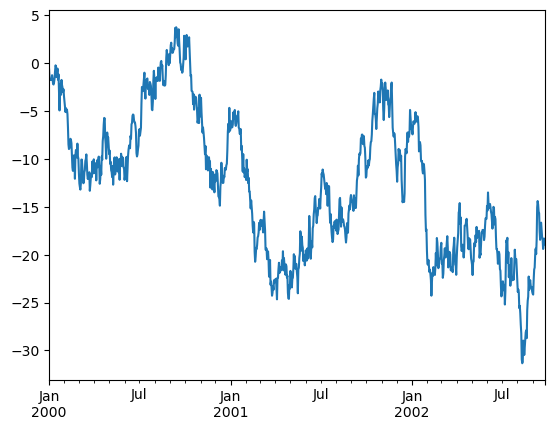

In [225]:
np.random.seed()
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();